# 🦄 Indian Unicorn Startup Analysis
This notebook performs EDA (Exploratory Data Analysis) on the dataset containing information about Indian Unicorns as of June 2023.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

plt.style.use('ggplot')

In [5]:
df = pd.read_csv('unicorn_dataset.csv')

In [6]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('($)', '', regex=True).str.lower()
df.rename(columns={'entry_valuation^^_($b)': 'entry_valuation'}, inplace=True)

In [11]:
# Ensure the columns are strings before applying string operations
df['entry_valuation'] = df['entry_valuation'].astype(str).str.replace('$', '').str.replace('B', '').astype(float)
df['valuation_($b)'] = df['valuation_($b)'].astype(str).str.replace('$', '').str.replace('B', '').astype(float)

# Convert 'entry' column to datetime and extract the year
df['entry_year'] = pd.to_datetime(df['entry'], errors='coerce').dt.year

C:\Users\Sahil\AppData\Local\Temp\ipykernel_19272\3856575133.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['entry_year'] = pd.to_datetime(df['entry'], errors='coerce').dt.year


## 📊 Total Unicorns

In [12]:
print('Total unicorns:', df.shape[0])

Total unicorns: 102


## 🔝 Top Sectors by Unicorn Count

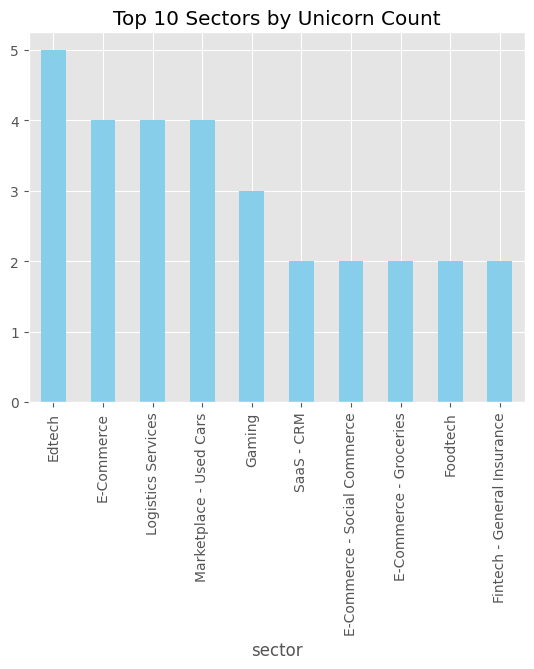

In [13]:
df['sector'].value_counts().head(10).plot(kind='bar', title='Top 10 Sectors by Unicorn Count', color='skyblue');

## 📈 Unicorn Entry Trend (Year-wise)

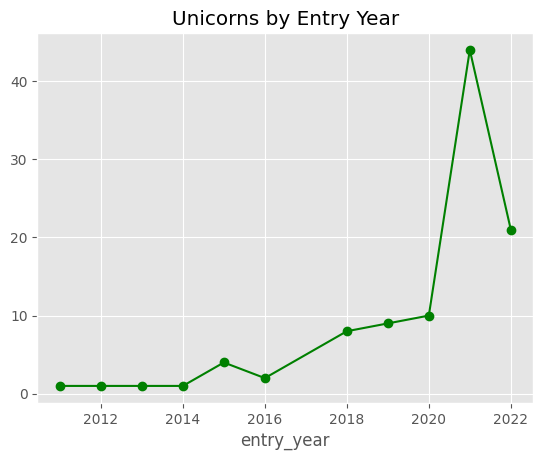

In [14]:
df['entry_year'].value_counts().sort_index().plot(kind='line', marker='o', title='Unicorns by Entry Year', color='green');

## 🌆 Top Cities by Unicorn HQ

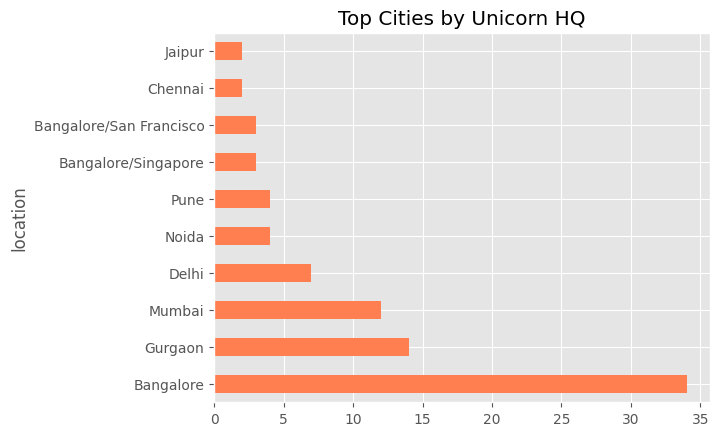

In [15]:
df['location'].value_counts().head(10).plot(kind='barh', title='Top Cities by Unicorn HQ', color='coral');

In [17]:
print(df.columns)

Index(['no.', 'company', 'sector', 'entry_valuation', 'valuation_($b)',
       'entry', 'location', 'select_investors', 'entry_year'],
      dtype='object')


## 💰 Distribution of Valuations

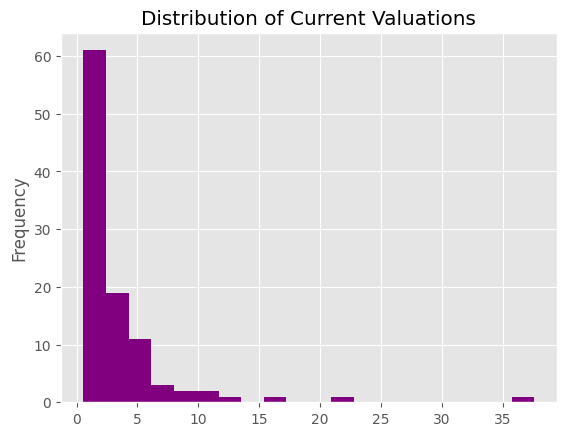

In [18]:
df['valuation_($b)'].plot(kind='hist', bins=20, title='Distribution of Current Valuations', color='purple');

## 💼 Sector-wise Total Valuation

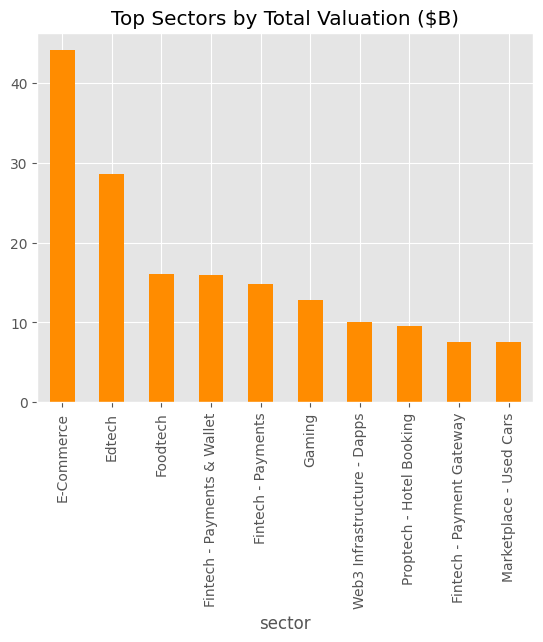

In [19]:
df.groupby('sector')['valuation_($b)'].sum().sort_values(ascending=False).head(10).plot(kind='bar', title='Top Sectors by Total Valuation ($B)', color='darkorange');

## 🏆 Top 10 Highest Valued Startups

In [21]:
df[['company', 'valuation_($b)']].sort_values(by='valuation_($b)', ascending=False).head(10)

,company,valuation_($b)
1,Flipkart^,37.6
10,BYJUS,22.0
4,PayTM^,16.0
33,PhonePe^,12.0
12,Swiggy,10.7
85,Polygon,10.0
15,OYO Rooms,9.6
21,Dream11,8.0
31,RazorPay,7.5
5,Ola Cabs,7.3


## 📈 Growth Rate Since Entry

In [23]:
df['growth_rate'] = ((df['valuation_($b)'] - df['entry_valuation']) / df['entry_valuation']) * 100
df[['company', 'growth_rate']].sort_values(by='growth_rate', ascending=False).head(10)

,company,growth_rate
1,Flipkart^,3660.000000
10,BYJUS,2100.000000
4,PayTM^,841.176471
21,Dream11,700.000000
12,Swiggy,664.285714
31,RazorPay,650.000000
7,Zomato^,440.000000
23,Icertis,400.000000
35,Dailyhunt,400.000000
5,Ola Cabs,356.250000


## 🤝 Most Common Investors

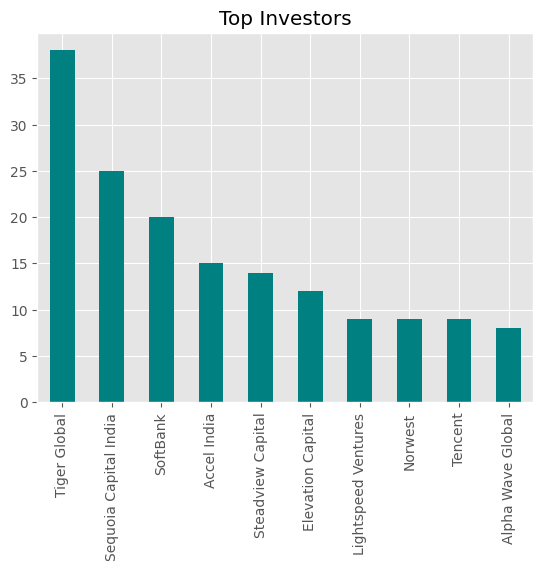

In [24]:
investors = df['select_investors'].dropna().str.split(', ')
flat_list = [inv for sublist in investors for inv in sublist]
pd.Series(Counter(flat_list)).sort_values(ascending=False).head(10).plot(kind='bar', title='Top Investors', color='teal');

## 🔄 Entry vs Current Valuation

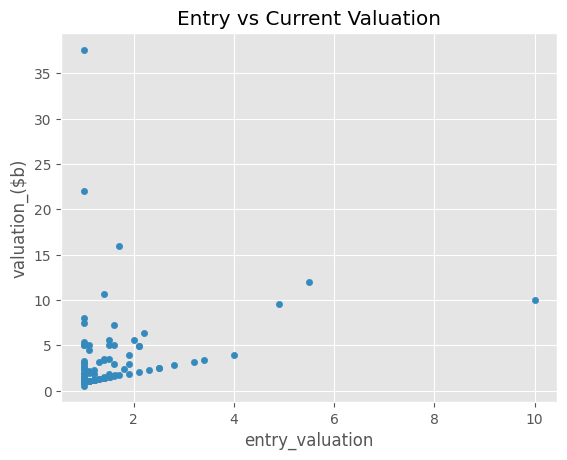

In [26]:
df[['entry_valuation', 'valuation_($b)']].plot.scatter(x='entry_valuation', y='valuation_($b)', title='Entry vs Current Valuation');

## 💾 Save Cleaned Data

In [27]:
df.to_csv('../data/cleaned_data.csv', index=False)